# CIS 678 Machine Learning Project 4(b) - Multilayer Perceptron
Tyler Reed

NOTE: To view all output, use nbviewer link below.
https://nbviewer.org/github/treed8887/ML/blob/main/CIS678-Project4b-MultilayerPerceptron.ipynb

### Overview
--------------
Implementing a simple multi-layer perceptron using the neural architecture described in the diagram below. Will step through the complete processing of a single instance:

    -Feedforward the inputs
    -Backpropagate error
    -Learn (update weights)
    


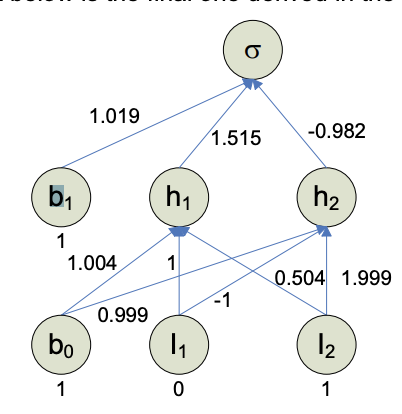

### Data
---------
Data is provided in the neural network displayed above.

In [1]:
import math

### Methodology
------------------
In the function below, the following three steps are executed in one instance to calculate the errors. After one epoch is executed, a second one begins through step 1, which simply shows the how the total network error has changed.

In [2]:
def mlperc():
    # initialize data
    t = 1
    eta = 0.5
    b_0, I_1, I_2, b_1, h_1, h_2 = 1, 0, 1, 1, None, None
    b_0h1, b_0h2, I_1h1, I_1h2, I_2h1, I_2h2, b_1y, h_1y, h_2y = 1, 1, 1, -1, 0.5, 2, 1, 1.5, -1
    
    for i in range(1,3):
        # STEP 1: Feedforward
        h1_out = 1/(1+math.exp(-((I_1h1*I_1)+(I_2h1*I_2)+(b_0h1*b_0))))
        h2_out = 1/(1+math.exp(-((I_1h2*I_1)+(I_2h2*I_2)+(b_0h2*b_0))))
        y = 1/(1+math.exp(-((h_1y*h1_out)+(h_2y*h2_out)+(b_1y*b_0))))
        total_e = 0.5*(1-y)**2
        print("\033[1m" + "Epoch " + str(i) + "\n" + "\033[0m" + "Step 1: Feedforward" + "\033[0m" + "\n"
             + "H1: " + "{:.3f}".format(h1_out)+ "; " + "H2: " + "{:.3f}".format(h2_out) + "; "
             + "y: " + "{:.3f}".format(y) + "\n" + "Total Error in Network: " 
             + "{:.3f}".format(total_e) + "\n")
        if i == 2:
            return

        # STEP 2: Backpropagation
        ey = y*(1-y)*(t-y)
        eh_1 = h1_out*(1-h1_out)*(h_1y*ey)
        eh_2 = h2_out*(1-h2_out)*(h_2y*ey)
        print("Step 2: Backpropagation of Errors" + "\n" + "E_H1: " + "{:.3f}".format(eh_1)+ "; " 
              + "E_H2: " + "{:.3f}".format(eh_2) + "; " + "E_y: " + "{:.3f}".format(ey) + "\n")    

        # STEP 3: Learn
        h_1y = h_1y + (eta)*(ey)*h1_out
        h_2y = h_2y + (eta)*(ey)*h2_out
        b_1y = b_1y + (eta)*(ey)*b_1

        I_1h1 = I_1h1 + (eta)*(eh_1)*(I_1)
        I_2h1 = I_2h1 + (eta)*(eh_1)*(I_2)
        b_0h1 = b_0h1 + (eta)*(eh_1)*(b_0)

        I_1h2 = I_1h2 + (eta)*(eh_2)*(I_1)
        I_2h2 = I_2h2 + (eta)*(eh_2)*(I_2)
        b_0h2 = b_0h2 + (eta)*(eh_2)*(b_0)
        print("Step 3: Learn" + "\n" + "W_H1y: " + "{:.3f}".format(h_1y)+ "; " + "W_H2y: " 
             + "{:.3f}".format(h_2y) + "; " + "W_b1y: " + "{:.3f}".format(b_1y) + "\n" + "W_I1h1: " 
             + "{:.3f}".format(I_1h1)+ "; " + "W_I2h1: " + "{:.3f}".format(I_2h1) + "; " + "W_b0h1: " 
             + "{:.3f}".format(b_0h1) + "\n" + "W_I1h2: " + "{:.3f}".format(I_1h2)+ "; " + "W_I2h2: " 
             + "{:.3f}".format(I_2h2) + "; " + "W_b0h2: " + "{:.3f}".format(b_0h2) + "\n")

In [3]:
mlperc()

Epoch 1
Step 1: Feedforward
H1: 0.818; H2: 0.953; y: 0.781
Total Error in Network: 0.024

Step 2: Backpropagation of Errors
E_H1: 0.008; E_H2: -0.002; E_y: 0.037

Step 3: Learn
W_H1y: 1.515; W_H2y: -0.982; W_b1y: 1.019
W_I1h1: 1.000; W_I2h1: 0.504; W_b0h1: 1.004
W_I1h2: -1.000; W_I2h2: 1.999; W_b0h2: 0.999

Epoch 2
Step 1: Feedforward
H1: 0.819; H2: 0.952; y: 0.790
Total Error in Network: 0.022

